# MARKET BASKET ANALYSIS

### The apriori algorithm is a set of procedures that must be followed in order to determine the most frequent itemset in a database.

In [35]:
#Market basket analysis using Apriori algorithm (refer notebook)

# Installing necessary packages and libraries

In [36]:
!pip install mlxtend

In [37]:
import numpy as np
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# Reading the dataset

In [38]:
data = pd.read_csv('C:\OLIST\olist_order_items_dataset.csv')
data = data.head(30000) #using only half data due to memory issues
data.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


# Analysis on the dataset

In [39]:
data.shape

(30000, 7)

In [40]:
data.order_id.unique().shape

(26222,)

In [41]:
data.insert(7, 'quantity',1)
data.shape

(30000, 8)

In [42]:
#In real world scenarios, you will receive data in this format with every product within an order given in separate rows. We have to find the relation between 2 or more products frequently appearing together. We can't use this data the way it is, we got to further convert this into a format that is accepted by Apriori algorithm.

# Data Preprocessing

### Things to be considered:

### 1) Total no. of unique orders and products
### 2) Whether to drop products that are purchased within a given threshold
### 3) Average no. of products purchased in a given order

In [45]:
data.describe(include = 'all')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,quantity
count,30000,30000.000000,30000,30000,30000,30000.000000,30000.000000,30000.0
unique,26222,NaN,13837,2267,25858,NaN,NaN,NaN
top,1b15974a0141d54e36626dca3fdc731a,NaN,422879e10f46682990de24d770e7f83d,6560211a19b47992c3666cc44a7e94c0,2018-03-01 02:50:48,NaN,NaN,NaN
freq,20,NaN,137,553,20,NaN,NaN,NaN
mean,NaN,1.202667,NaN,NaN,NaN,120.894465,20.048084,1.0
std,NaN,0.722918,NaN,NaN,NaN,187.854795,16.037283,0.0
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000,1.0
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.010000,1.0
50%,NaN,1.000000,NaN,NaN,NaN,74.900000,16.280000,1.0
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.222500,1.0


### We can drop the values that fall below the threshold as they dont contribute much to the processing

In [47]:
data['product_id'].value_counts()

422879e10f46682990de24d770e7f83d    137
aca2eb7d00ea1a7b8ebd4e68314663af    130
99a4788cb24856965c36a24e339b6058    125
368c6c730842d78016ad823897a372db    113
389d119b48cf3043d311335e499d9c6b    104
                                   ... 
c98cf453c550c3349275b8381ebb3509      1
4710a0bdb9d5f433754a8c77de67ed88      1
9b22f7b1cdb025c57df28403bc48edce      1
95d9994fadaf3720792cb0f1db17f782      1
c30af44af15fb162e1ee0233c7e5d583      1
Name: product_id, Length: 13837, dtype: int64

In [48]:
data['product_id'].value_counts()

422879e10f46682990de24d770e7f83d    137
aca2eb7d00ea1a7b8ebd4e68314663af    130
99a4788cb24856965c36a24e339b6058    125
368c6c730842d78016ad823897a372db    113
389d119b48cf3043d311335e499d9c6b    104
                                   ... 
c98cf453c550c3349275b8381ebb3509      1
4710a0bdb9d5f433754a8c77de67ed88      1
9b22f7b1cdb025c57df28403bc48edce      1
95d9994fadaf3720792cb0f1db17f782      1
c30af44af15fb162e1ee0233c7e5d583      1
Name: product_id, Length: 13837, dtype: int64

In [49]:
#If you want to cross check the data you can replace 10 with 80.
item_freq = data['product_id'].value_counts()
data = data[data.isin(item_freq.index[item_freq >= 10]).values]
data['product_id'].value_counts()

422879e10f46682990de24d770e7f83d    137
aca2eb7d00ea1a7b8ebd4e68314663af    130
99a4788cb24856965c36a24e339b6058    125
368c6c730842d78016ad823897a372db    113
389d119b48cf3043d311335e499d9c6b    104
                                   ... 
77cc62dc80ebe12a0452d1ce0565acdc     10
1a758361b1c10b3ffe3d3373332de319     10
44fded21627553d1886d459384bbce06     10
a02d0123079f4ae96001ba2010d1a2df     10
22c5ddc22ea8cae84fc9917def682dc6     10
Name: product_id, Length: 329, dtype: int64

In [50]:
data.to_csv('varad.csv')

In [51]:
data['product_id'] = data['product_id'].astype(str)

In [52]:
data['product_id'] = data['product_id'].replace(['P05548'],'Garden Hose')
data['product_id'] = data['product_id'].replace(['P25745'],'Common Garden Rake')
data['product_id'] = data['product_id'].replace(['P28011'],'24-Tine Steel Rake')
data['product_id'] = data['product_id'].replace(['P12927'],'Stand-up Weeder')
data['product_id'] = data['product_id'].replace(['P03185'],'15-Tine Forged Bow')

In [53]:
data.loc[data['product_id'] == 'Garden Hose']

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,quantity


In [54]:
data.to_csv('varadfinal.csv')

In [55]:
#Average products purchased per transaction
data['order_id'].value_counts().mean()

1.154075546719682

# Creation of Baskets for products, quantity and orders

In [1]:
basket = (data.groupby(['order_id','product_id'])['quantity']).sum().unstack().reset_index().fillna(0).set_index('order_id')
basket.head()

NameError: name 'data' is not defined

In [57]:
def encode_units(x):
    if x<= 0:
        return 0
    if x>=1:
        return 1
    
basket_sets = basket.applymap(encode_units)
basket_sets.head()

product_id,0152f69b6cf919bcdaf117aa8c43e5a2,017692475c1c954ff597feda05131d73,03e1c946c0ddfc58724ff262aef08dff,044f05bc9de36e8a693a83e4bc79dd0d,054515fd15bc1a2029f10de97ffa9120,060c17562f97e5bb60bc0dfa4dd5b3f2,06c6e01186af8b98ee1fc9e01f9471e9,06edb72f1e0c64b14c5b79353f7abea3,08574b074924071f4e201e151b152b4e,0a4093a4af429dc0a9334300e5c13ae5,...,f7a17d2c51d9df89a4f1711c4ac17f33,f7f59e6186e10983a061ac7bdb3494d6,f8b624d4e475bb8d1bddf1b65c6a64f6,f908d3bf313a1308bfb2a46ea2685347,fb55982be901439613a95940feefd9ee,fbc1488c1a1e72ba175f53ab29a248e8,fbce4c4cb307679d89a3bf3d3bb353b9,fc1d8637c0268af3db482c14b7ef8e75,fe01b643060a6446e59f58e3021e66b3,fe077ec80df6b4ee60bb4498d5ab1962
order_id,,,,,,,,,,,,,,,,,,,,,
00061f2a7bc09da83e415a52dc8a4af1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0006ec9db01a64e59a68b2c340bf65a7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0008288aa423d2a3f00fcb17cd7d8719,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
00130c0eee84a3d909e75bc08c5c3ca1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0015ebb40fb17286bea51d4607c4733c,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Recommendation of similar products

### Similar products are recommended using apriori algorithms.
### The following steps are followed :
### 1)Create a basket of all products, orders and quantity
### 2)Perform One hot encoding so as to convert all quantities into format suitable for apriori algorithm
### 3)Build list of frequent itemsets
### 4)Generate rules based on your requirements


# Build frequent itemsets

In [59]:
frequent_itemsets = apriori(basket_sets, min_support = 0.0001, use_colnames = True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.002651,(0152f69b6cf919bcdaf117aa8c43e5a2),1
1,0.001491,(017692475c1c954ff597feda05131d73),1
2,0.000497,(03e1c946c0ddfc58724ff262aef08dff),1
3,0.001657,(044f05bc9de36e8a693a83e4bc79dd0d),1
4,0.001657,(054515fd15bc1a2029f10de97ffa9120),1
...,...,...,...
373,0.000166,"(389d119b48cf3043d311335e499d9c6b, 422879e10f4...",3
374,0.000166,"(389d119b48cf3043d311335e499d9c6b, 0bcc3eeca39...",3
375,0.000166,"(422879e10f46682990de24d770e7f83d, 0bcc3eeca39...",3
376,0.000166,"(389d119b48cf3043d311335e499d9c6b, 422879e10f4...",3


# Specification of association rules

In [60]:
rules = association_rules(frequent_itemsets, metric = 'support', min_threshold = 0.0001)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(e0cf79767c5b016251fe139915c59a26),(0a4093a4af429dc0a9334300e5c13ae5),0.005467,0.001491,0.000166,0.030303,20.323232,0.000158,1.029712
1,(0a4093a4af429dc0a9334300e5c13ae5),(e0cf79767c5b016251fe139915c59a26),0.001491,0.005467,0.000166,0.111111,20.323232,0.000158,1.118849
2,(6c3effec7c8ddba466d4f03f982c7aa3),(0aabfb375647d9738ad0f7b4ea3653b1),0.005302,0.006958,0.000331,0.062500,8.982143,0.000294,1.059245
3,(0aabfb375647d9738ad0f7b4ea3653b1),(6c3effec7c8ddba466d4f03f982c7aa3),0.006958,0.005302,0.000331,0.047619,8.982143,0.000294,1.044433
4,(368c6c730842d78016ad823897a372db),(0bcc3eeca39e1064258aa1e932269894),0.014414,0.003479,0.000166,0.011494,3.303777,0.000116,1.008108
...,...,...,...,...,...,...,...,...,...
125,"(0bcc3eeca39e1064258aa1e932269894, 53759a2ecdd...","(389d119b48cf3043d311335e499d9c6b, 422879e10f4...",0.000331,0.000828,0.000166,0.500000,603.600000,0.000165,1.998343
126,(389d119b48cf3043d311335e499d9c6b),"(422879e10f46682990de24d770e7f83d, 0bcc3eeca39...",0.013917,0.000166,0.000166,0.011905,71.857143,0.000163,1.011881
127,(422879e10f46682990de24d770e7f83d),"(389d119b48cf3043d311335e499d9c6b, 0bcc3eeca39...",0.017396,0.000166,0.000166,0.009524,57.485714,0.000163,1.009448
128,(0bcc3eeca39e1064258aa1e932269894),"(389d119b48cf3043d311335e499d9c6b, 422879e10f4...",0.003479,0.000166,0.000166,0.047619,287.428571,0.000165,1.049826


In [61]:
rules[rules['confidence'] >= 0.50]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
86,"(368c6c730842d78016ad823897a372db, 0bcc3eeca39...",(53759a2ecddad2bb87a079a1f1519f73),0.000166,0.012757,0.000166,1.0,78.389610,0.000164,inf
88,"(0bcc3eeca39e1064258aa1e932269894, 53759a2ecdd...",(368c6c730842d78016ad823897a372db),0.000331,0.014414,0.000166,0.5,34.689655,0.000161,1.971173
93,"(389d119b48cf3043d311335e499d9c6b, 0bcc3eeca39...",(422879e10f46682990de24d770e7f83d),0.000166,0.017396,0.000166,1.0,57.485714,0.000163,inf
94,"(422879e10f46682990de24d770e7f83d, 0bcc3eeca39...",(389d119b48cf3043d311335e499d9c6b),0.000166,0.013917,0.000166,1.0,71.857143,0.000163,inf
98,"(389d119b48cf3043d311335e499d9c6b, 0bcc3eeca39...",(53759a2ecddad2bb87a079a1f1519f73),0.000166,0.012757,0.000166,1.0,78.389610,0.000164,inf
100,"(0bcc3eeca39e1064258aa1e932269894, 53759a2ecdd...",(389d119b48cf3043d311335e499d9c6b),0.000331,0.013917,0.000166,0.5,35.928571,0.000161,1.972167
104,"(422879e10f46682990de24d770e7f83d, 0bcc3eeca39...",(53759a2ecddad2bb87a079a1f1519f73),0.000166,0.012757,0.000166,1.0,78.389610,0.000164,inf
105,"(422879e10f46682990de24d770e7f83d, 53759a2ecdd...",(0bcc3eeca39e1064258aa1e932269894),0.000166,0.003479,0.000166,1.0,287.428571,0.000165,inf
106,"(0bcc3eeca39e1064258aa1e932269894, 53759a2ecdd...",(422879e10f46682990de24d770e7f83d),0.000331,0.017396,0.000166,0.5,28.742857,0.000160,1.965209
112,"(422879e10f46682990de24d770e7f83d, 53759a2ecdd...",(389d119b48cf3043d311335e499d9c6b),0.000166,0.013917,0.000166,1.0,71.857143,0.000163,inf


In [62]:
rulesconf = rules[rules['confidence'] >= 0.50]

In [63]:
rulesconf.sort_values('confidence', ascending=False, inplace=True)

<ipython-input-63-b2346f85da2e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rulesconf.sort_values('confidence', ascending=False, inplace=True)


In [64]:
rulesconf.reset_index()

,index,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,86,"(368c6c730842d78016ad823897a372db, 0bcc3eeca39...",(53759a2ecddad2bb87a079a1f1519f73),0.000166,0.012757,0.000166,1.0,78.389610,0.000164,inf
1,116,"(389d119b48cf3043d311335e499d9c6b, 422879e10f4...",(53759a2ecddad2bb87a079a1f1519f73),0.000166,0.012757,0.000166,1.0,78.389610,0.000164,inf
2,124,"(422879e10f46682990de24d770e7f83d, 53759a2ecdd...","(389d119b48cf3043d311335e499d9c6b, 0bcc3eeca39...",0.000166,0.000166,0.000166,1.0,6036.000000,0.000166,inf
3,123,"(422879e10f46682990de24d770e7f83d, 0bcc3eeca39...","(389d119b48cf3043d311335e499d9c6b, 53759a2ecdd...",0.000166,0.000663,0.000166,1.0,1509.000000,0.000166,inf
4,121,"(389d119b48cf3043d311335e499d9c6b, 0bcc3eeca39...","(422879e10f46682990de24d770e7f83d, 53759a2ecdd...",0.000166,0.000166,0.000166,1.0,6036.000000,0.000166,inf
5,119,"(422879e10f46682990de24d770e7f83d, 0bcc3eeca39...",(389d119b48cf3043d311335e499d9c6b),0.000166,0.013917,0.000166,1.0,71.857143,0.000163,inf
6,118,"(389d119b48cf3043d311335e499d9c6b, 0bcc3eeca39...",(422879e10f46682990de24d770e7f83d),0.000166,0.017396,0.000166,1.0,57.485714,0.000163,inf
7,117,"(389d119b48cf3043d311335e499d9c6b, 422879e10f4...",(0bcc3eeca39e1064258aa1e932269894),0.000166,0.003479,0.000166,1.0,287.428571,0.000165,inf
8,112,"(422879e10f46682990de24d770e7f83d, 53759a2ecdd...",(389d119b48cf3043d311335e499d9c6b),0.000166,0.013917,0.000166,1.0,71.857143,0.000163,inf
9,105,"(422879e10f46682990de24d770e7f83d, 53759a2ecdd...",(0bcc3eeca39e1064258aa1e932269894),0.000166,0.003479,0.000166,1.0,287.428571,0.000165,inf


# Visual Representation

In [66]:
rulesconf.shape

(18, 9)

In [67]:
!pip install decorator==5.0.9

ValueError: Received invalid argument(s): edges

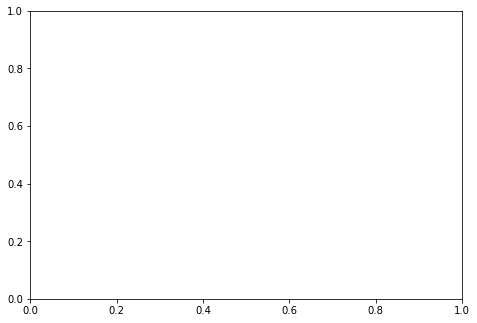

In [68]:
import networkx as nx
import matplotlib.pyplot as plt  
%matplotlib inline

def draw_graph(rules, rules_to_show):
    G1 = nx.DiGraph()
    color_map=[]
    N = 50
    colors = np.random.rand(N)    
    strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6', 'R7', 'R8', 'R9', 'R10', 'R11', 'R12', 'R13', 'R14', 'R15', 'R16', 'R17']

    for i in range(rules_to_show):
        G1.add_nodes_from(["R"+str(i)])
        for a in rules.iloc[i]['antecedents']:
            G1.add_nodes_from([a])
            G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)
        for c in rules.iloc[i]['consequents']:
            G1.add_nodes_from([c])
            G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

    for node in G1:
        found_a_string = False
        for item in strs: 
            if node==item:
                found_a_string = True
        if found_a_string:
            color_map.append('yellow')
        else:
            color_map.append('green')       

    edges = G1.edges()
    colors = [G1[u][v]['color'] for u,v in edges]
    weights = [G1[u][v]['weight'] for u,v in edges]

    pos = nx.spring_layout(G1, k=16, scale=1)
    nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, 
            with_labels=False)            

    for p in pos:  # raise text positions
        pos[p][1] += 0.07
        nx.draw_networkx_labels(G1, pos)
        #plt.figsize(32,10)
        plt.show()

draw_graph (rulesconf, 10)

In [69]:
rulesconfcopy = rulesconf.copy()

In [70]:
rulesconfcopy.reset_index(drop=True, inplace=True)

In [71]:
rulesconfcopy

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(368c6c730842d78016ad823897a372db, 0bcc3eeca39...",(53759a2ecddad2bb87a079a1f1519f73),0.000166,0.012757,0.000166,1.0,78.389610,0.000164,inf
1,"(389d119b48cf3043d311335e499d9c6b, 422879e10f4...",(53759a2ecddad2bb87a079a1f1519f73),0.000166,0.012757,0.000166,1.0,78.389610,0.000164,inf
2,"(422879e10f46682990de24d770e7f83d, 53759a2ecdd...","(389d119b48cf3043d311335e499d9c6b, 0bcc3eeca39...",0.000166,0.000166,0.000166,1.0,6036.000000,0.000166,inf
3,"(422879e10f46682990de24d770e7f83d, 0bcc3eeca39...","(389d119b48cf3043d311335e499d9c6b, 53759a2ecdd...",0.000166,0.000663,0.000166,1.0,1509.000000,0.000166,inf
4,"(389d119b48cf3043d311335e499d9c6b, 0bcc3eeca39...","(422879e10f46682990de24d770e7f83d, 53759a2ecdd...",0.000166,0.000166,0.000166,1.0,6036.000000,0.000166,inf
5,"(422879e10f46682990de24d770e7f83d, 0bcc3eeca39...",(389d119b48cf3043d311335e499d9c6b),0.000166,0.013917,0.000166,1.0,71.857143,0.000163,inf
6,"(389d119b48cf3043d311335e499d9c6b, 0bcc3eeca39...",(422879e10f46682990de24d770e7f83d),0.000166,0.017396,0.000166,1.0,57.485714,0.000163,inf
7,"(389d119b48cf3043d311335e499d9c6b, 422879e10f4...",(0bcc3eeca39e1064258aa1e932269894),0.000166,0.003479,0.000166,1.0,287.428571,0.000165,inf
8,"(422879e10f46682990de24d770e7f83d, 53759a2ecdd...",(389d119b48cf3043d311335e499d9c6b),0.000166,0.013917,0.000166,1.0,71.857143,0.000163,inf
9,"(422879e10f46682990de24d770e7f83d, 53759a2ecdd...",(0bcc3eeca39e1064258aa1e932269894),0.000166,0.003479,0.000166,1.0,287.428571,0.000165,inf


In [72]:
rulesconfcopy.to_csv('rulesconfidence.csv')